In [90]:
# Import dependencies
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# Read csv file
newfile = 'Resources/Climate_Deniers_Map.csv'
file2 = 'Resources/NA_sample_020.csv'
df = pd.read_csv(newfile)
df2 = pd.read_csv(file2)

# Convert to appropriate data types & extract date column
newdf = df.copy()
newdf['created_at'] = df['created_at'].astype('datetime64')
newdf['date'] = newdf['created_at'].dt.to_period('M')

# Organize columns & display data
data = newdf.loc[:, ['date', 'lat', 'lng', 'topic', 'sentiment', 'aggressiveness', 'gender', 'created_at']]
print(data.dtypes)
data.head()

date                   period[M]
lat                      float64
lng                      float64
topic                     object
sentiment                float64
aggressiveness            object
gender                    object
created_at        datetime64[ns]
dtype: object


,date,lat,lng,topic,sentiment,aggressiveness,gender,created_at
0,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male,2006-12-17 19:43:09
1,2007-01,36.112637,-80.014484,Weather Extremes,-0.377974,aggressive,male,2007-01-18 13:22:52
2,2007-01,25.963890,-80.244170,Weather Extremes,0.567071,not aggressive,undefined,2007-01-24 10:13:18
3,2007-03,30.287986,-97.778898,Weather Extremes,-0.253728,not aggressive,male,2007-03-03 15:23:53
4,2007-03,37.779026,-122.419906,Weather Extremes,-0.433604,aggressive,male,2007-03-13 23:03:07


In [ ]:
# Convert to appropriate data types & extract date column
newdf2 = df2.copy()
newdf2['created_at'] = df2['created_at'].astype('datetime64')
newdf2['date'] = newdf2['created_at'].dt.to_period('M')

# Organize columns & display data
d2 = newdf2.loc[:, ['date', 'lat', 'lng', 'topic', 'sentiment', 'aggressiveness', 'gender', 'created_at']]
print(d2.dtypes)
d2.head()

In [201]:
# Group by topics & get the first posts for each
topics = data.groupby('topic')
early = topics['created_at'].min()

# Get the first few posts for each topic to see the following spread
topics2 = data.groupby('topic')['created_at'].nsmallest(5)
topics2

# Merge each of these sets with original df to get the info for each post
firsts = pd.merge(early, data, how='left')
spread = pd.merge(topics2, data, how='left')
nx = pd.concat([firsts, spread])
nxt = nx.drop_duplicates(keep=False)

# Display data
print(len(nxt))
firsts

40


,created_at,date,lat,lng,topic,sentiment,aggressiveness,gender,Sentiment
0,2007-04-06 08:17:31,2007-04,35.227209,-80.843083,Donald Trump versus Science,-0.604242,not aggressive,male,Very Low
1,2007-03-31 12:16:59,2007-03,35.227090,-80.843130,Global stance,-0.404815,not aggressive,male,Low
2,2007-04-07 15:26:24,2007-04,30.271129,-97.743700,Ideological Positions on Global Warming,-0.515978,not aggressive,male,Very Low
3,2007-05-02 17:11:53,2007-05,50.666480,-120.319200,Impact of Resource Overconsumption,-0.690117,aggressive,male,Very Low
4,2007-04-20 18:17:23,2007-04,42.081156,-87.980216,Importance of Human Intervantion,-0.359227,aggressive,male,Low
5,2007-08-19 13:33:24,2007-08,51.508530,-0.125740,Politics,-0.295054,aggressive,male,Low
6,2007-04-12 03:40:27,2007-04,27.947520,-82.458430,Seriousness of Gas Emissions,-0.456556,aggressive,male,Low
7,2007-10-03 06:57:04,2007-10,-27.467940,153.028090,Significance of Pollution Awareness Events,-0.737047,aggressive,male,Very Low
8,2007-07-12 17:49:09,2007-07,38.895110,-77.036370,Undefined / One Word Hashtags,0.761608,not aggressive,male,High
9,2006-12-17 19:43:09,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male,Very Low


In [213]:
%%capture --no-display

map1 = nxt.hvplot.points(
    "lng",
    "lat",
    coastline = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 350,
    s = 100,
    color = "topic",
    #colormap = ("inferno"),
    alpha = .6,
    title = "Earliest Tweets on Climate Change by Location"
) 

map2 = firsts.hvplot.points(
    "lng",
    "lat",
    coastline = True,
    frame_width = 600,
    frame_height = 350,
    s = 80,
    color = "red", # changing color to topic also breaks the hover...hmm
    #add col hover topic, can it include "firsts" also?
    #hover_cols = ["lat", "lng", "topic"] # ok so this just breaks it entirely? wut
)

# Display the map
full = map1 * map2
full

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.I     :Points   [lng,lat]   (topic)
   .Coastline.I  :Feature   [Longitude,Latitude]
   .Points.II    :Points   [lng,lat]
   .Coastline.II :Feature   [Longitude,Latitude]

### Analysis notes...
majority of twitter users & majority of climate change discourse originates in the US
no major discernible patterns in geographic locations to the spread, most of
the early posts come from coastal or near-coastal regions, regardless of country/continent
(only a few exceptions in the first 3 from the US midwest region)
these are also mostly from large cities - highly populated areas

In [214]:
# Save copy of map (in spite of protestations...)
hvplot.save(full, "Images/Earliest-Tweets-Map.png")

c:\Users\barim\anaconda3\envs\PythonData\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\barim\anaconda3\envs\PythonData\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\barim\anaconda3\envs\PythonData\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
c:\Users\barim\anaconda3\envs\PythonData\lib\site

In [95]:
# Find quartiles of sentiment value
print(data['sentiment'].describe())

# Create bins to group sentiment by
bins = [-1, -.5, -.2, 0, 1]
names = ["Very Low", "Low", "Average", "High"]

# Cut dataset into sentiment groups by quartiles & display results
data['Sentiment'] = pd.cut(data['sentiment'], bins, labels=names, include_lowest=True)
data.head()


count    365317.000000
mean         -0.225414
std           0.384433
min          -0.989643
25%          -0.522066
50%          -0.331963
75%           0.030237
max           0.979194
Name: sentiment, dtype: float64


,date,lat,lng,topic,sentiment,aggressiveness,gender,created_at,Sentiment
0,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male,2006-12-17 19:43:09,Very Low
1,2007-01,36.112637,-80.014484,Weather Extremes,-0.377974,aggressive,male,2007-01-18 13:22:52,Low
2,2007-01,25.963890,-80.244170,Weather Extremes,0.567071,not aggressive,undefined,2007-01-24 10:13:18,High
3,2007-03,30.287986,-97.778898,Weather Extremes,-0.253728,not aggressive,male,2007-03-03 15:23:53,Low
4,2007-03,37.779026,-122.419906,Weather Extremes,-0.433604,aggressive,male,2007-03-13 23:03:07,Low


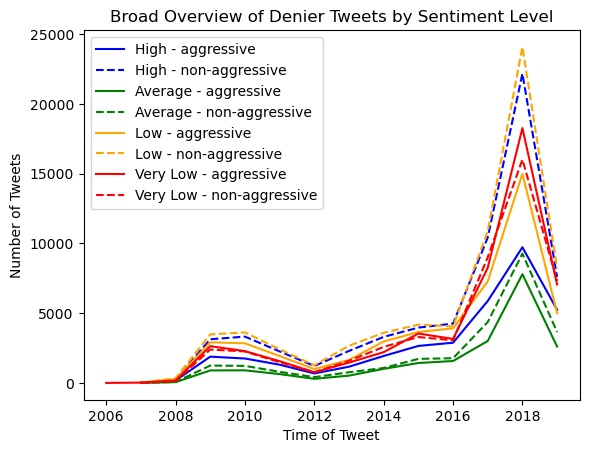

In [108]:
# Create 'years' column to group data by for broad overview plot
yrs = data['date'].dt.year
table = data.copy()
table['year'] = yrs

# Create function to plot lines for each sentiment bin level
def plot_sent(name, color):
    df1 = table.loc[(table['Sentiment'] == name) & (table['aggressiveness'] == 'aggressive'), :].reset_index(drop=True)
    df2 = table.loc[(table['Sentiment'] == name) & (table['aggressiveness'] != 'aggressive'), :].reset_index(drop=True)
    count = df1.groupby('year').count()
    count2 = df2.groupby('year').count()

    # Plot a solid line for aggressive tweets and dotted line for non-aggressive tweets
    count['topic'].plot(kind='line', color=color, label=name + " - aggressive")
    count2['topic'].plot(kind='line', color=color, linestyle="--", label=name + " - non-aggressive")

# Graph the lines in colors to represent the sentiment levels
plot_sent('High', 'blue')
plot_sent('Average', 'green')
plot_sent('Low', 'orange')
plot_sent('Very Low', 'red')

# Add other graph elements & display results

plt.xlabel("Time of Tweet")
plt.ylabel("Number of Tweets")
plt.title("Broad Overview of Denier Tweets by Sentiment Level")
plt.legend(loc='best')
plt.savefig("Images/Deniers-Sentiment-Overview.png")
plt.show()

# read up on og dataset documentation for more info on sentiment meaning - add analysis here
# may reconsider & take a different approach for this one...scatter plot instead or some other approach?

['Weather Extremes' 'Global stance' 'Donald Trump versus Science'
 'Ideological Positions on Global Warming' 'Seriousness of Gas Emissions'
 'Importance of Human Intervantion' 'Impact of Resource Overconsumption'
 'Undefined / One Word Hashtags' 'Politics'
 'Significance of Pollution Awareness Events']


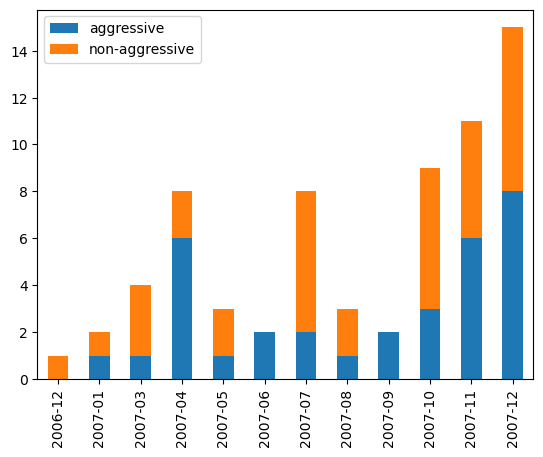

In [172]:
# bar chart showing early posts by number/% aggressive/sentiment breakdown for one topic 
# (maybe interactive?)
# stick to first few years on this one for more detail

year = 2007
t = "Weather Extremes"

# How could this be changed to grab the first 12-15 values for each topic instead? (so a differenet date range for each topic?)

dfyr = table.loc[(table['year'] <= year) & (table['topic'] == t), ['date','aggressiveness','Sentiment']]


bottom = dfyr.loc[dfyr['aggressiveness'] == 'aggressive', 'date'].value_counts()
top = dfyr.loc[dfyr['aggressiveness'] != 'aggressive', 'date'].value_counts()

graph = pd.DataFrame({
    "aggressive": top,
    "non-aggressive": bottom
})

graph = graph.fillna(0)
graph['non-aggressive'] = graph['non-aggressive'].astype('int')

x = graph.plot.bar(stacked=True)

print(data['topic'].unique())
plt.show()

# add $ showing % aggression at the top of each bar
# add adjacent bar showing average sentiment color value
# add interactive feature last (cycle topics, change year or year range more easily - currently <= to start from beginning)
